In [1]:
import random
import numpy as np
import pandas as pd
import seaborn as sn
from numpy import std
from numpy import mean
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\Xtras\Top_CpGWithFeat_RanFor
df1 = pd.read_csv ('Any2Common_inAll45Feats_Data_Male.csv')
df2 = pd.read_csv ('Top50CpGFromEachFeat_Male.csv')
df = pd.merge(df1, df2, on = 'PATNO', how = 'inner')
print(df.shape)
df.to_csv('Top50CpGFromEachFeat_withFeaturesMale.csv', index = False)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\Xtras\Top_CpGWithFeat_RanFor
(110, 333)


,PATNO,APPRDX,UPSIT,MDSP_Fatigue,MDS_Depress,MDSP_SleepDay,Montreal_Cognitive,Symbol_Digit,Trail_Making_B,Hopkins_Recog,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
0,3010,1,2,1,0,1,0,1,0,0,...,0.888328,0.877049,0.797177,0.909657,0.868391,0.271963,0.217017,0.798434,0.865337,0.797210
1,3024,1,0,0,0,1,0,1,1,0,...,0.921008,0.902903,0.803936,0.944746,0.848535,0.255776,0.315006,0.741850,0.947519,0.849925


In [3]:
df2 = pd.read_csv ('NMI_Methylome_Male06_Data.csv')
df = pd.merge(df1, df2, on = 'PATNO', how = 'inner')
print(df.shape)
df.to_csv('NMI06_Methylome_withFeaturesMale.csv', index = False)
df.head(2)

(110, 337)


,PATNO,APPRDX,UPSIT,MDSP_Fatigue,MDS_Depress,MDSP_SleepDay,Montreal_Cognitive,Symbol_Digit,Trail_Making_B,Hopkins_Recog,...,cg09372808,cg08109545,cg03769939,cg04824818,cg19056515,cg18868933,cg11206312,cg00295303,cg00113363,cg23377551
0,3010,1,2,1,0,1,0,1,0,0,...,0.830427,0.884956,0.756753,0.940765,0.971701,0.846877,0.023055,0.873930,0.013067,0.791148
1,3024,1,0,0,0,1,0,1,1,0,...,0.862808,0.925436,0.860627,0.950304,0.977101,0.840250,0.019627,0.824648,0.011850,0.795784


In [24]:
df1 = pd.read_csv ('NMI_Methylome_Male06_Data.csv')
df2 = pd.read_csv ('Top50CpGFromEachFeat_Male.csv')
# get the common columns
common_cols = set(df1.columns).intersection(set(df2.columns))
# create a new dataframe with only the common columns
df_common = df1[list(common_cols)]
df_common['APPRDX'] = df2['APPRDX'] 
# print the common columns for the new dataframe
print(df_common.shape)
df_common.head(2)

(308, 87)


C:\Users\system 4\AppData\Local\Temp\ipykernel_2616\2726421646.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_common['APPRDX'] = df2['APPRDX']


,cg13675469,cg01360545,cg14874036,cg11485463,cg10946043,cg15308142,cg17713010,cg04369109,cg06796451,cg18859045,...,cg25622125,cg15953070,cg24595745,cg23336965,cg01070424,cg04559183,cg06435511,cg20003494,cg16004767,APPRDX
0,0.012919,0.605723,0.802617,0.011261,0.018902,0.753923,0.043544,0.012305,0.846454,0.233609,...,0.887726,0.861183,0.012493,0.724662,0.450485,0.019346,0.960060,0.025708,0.882369,1
1,0.011403,0.561032,0.816139,0.018438,0.015856,0.743975,0.021684,0.010500,0.843151,0.264131,...,0.910430,0.870926,0.012928,0.670002,0.351910,0.017500,0.962378,0.035014,0.892872,2


In [25]:
df_common.to_csv('CommonCpg_inNMI06AndTop50s_Male.csv', index = False)

In [4]:
df = pd.read_csv('Top50CpGFromEachFeat_withFeaturesMale.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(110, 332)


,APPRDX,UPSIT,MDSP_Fatigue,MDS_Depress,MDSP_SleepDay,Montreal_Cognitive,Symbol_Digit,Trail_Making_B,Hopkins_Recog,cg00035237,...,cg26740481,cg26826631,cg26884787,cg26941073,cg26942930,cg27266871,cg27498387,cg27559224,cg27625886,cg27648238
0,0,2,1,0,1,0,1,0,0,0.017622,...,0.888328,0.877049,0.797177,0.909657,0.868391,0.271963,0.217017,0.798434,0.865337,0.797210
1,0,0,0,0,1,0,1,1,0,0.008082,...,0.921008,0.902903,0.803936,0.944746,0.848535,0.255776,0.315006,0.741850,0.947519,0.849925


In [5]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.5166666666666667
2
Mean accuracy: 0.5833333333333333
3
Mean accuracy: 0.6666666666666667
4
Mean accuracy: 0.5333333333333334
5
Mean accuracy: 0.6333333333333333
6
Mean accuracy: 0.6
7
Mean accuracy: 0.4
8
Mean accuracy: 0.55
9
Mean accuracy: 0.5
10
Mean accuracy: 0.55
11
Mean accuracy: 0.6
12
Mean accuracy: 0.6
13
Mean accuracy: 0.55
14
Mean accuracy: 0.6000000000000001
15
Mean accuracy: 0.4999999999999999
16
Mean accuracy: 0.6
17
Mean accuracy: 0.5333333333333333
18
Mean accuracy: 0.6
19
Mean accuracy: 0.55
20
Mean accuracy: 0.6333333333333333
21
Mean accuracy: 0.5833333333333333
22
Mean accuracy: 0.4833333333333333
23
Mean accuracy: 0.6166666666666666
24
Mean accuracy: 0.7666666666666666
25
Mean accuracy: 0.5999999999999999
26
Mean accuracy: 0.5
27
Mean accuracy: 0.5333333333333333
28
Mean accuracy: 0.5166666666666667
29
Mean accuracy: 0.5166666666666666
30
Mean accuracy: 0.4666666666666666
31
Mean accuracy: 0.7166666666666666
32
Mean accuracy: 0.5333333333333332
3

In [6]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("Top50CpGFromEachFeat_withFeaturesMale_100RF.csv", index=False)

0.5836666666666666


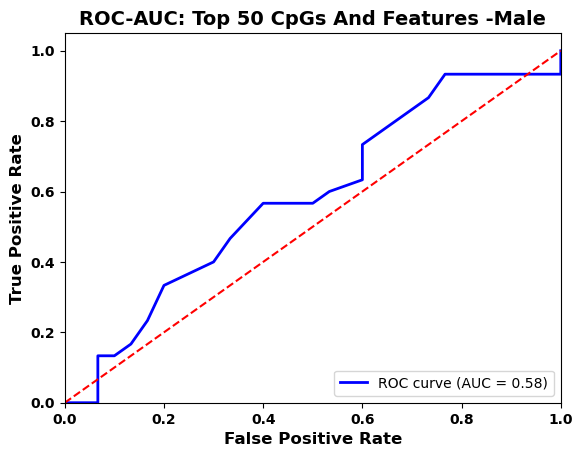

In [7]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Top 50 CpGs And Features -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_Top50CpGFromEachFeat_withFeaturesMale.svg')
plt.savefig('ROC_AUC_Top50CpGFromEachFeat_withFeaturesMale.pdf')
plt.show()


In [8]:
df = pd.read_csv('NMI06_Methylome_withFeaturesMale.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(110, 336)


,APPRDX,UPSIT,MDSP_Fatigue,MDS_Depress,MDSP_SleepDay,Montreal_Cognitive,Symbol_Digit,Trail_Making_B,Hopkins_Recog,cg16117273,...,cg09372808,cg08109545,cg03769939,cg04824818,cg19056515,cg18868933,cg11206312,cg00295303,cg00113363,cg23377551
0,0,2,1,0,1,0,1,0,0,0.162057,...,0.830427,0.884956,0.756753,0.940765,0.971701,0.846877,0.023055,0.873930,0.013067,0.791148
1,0,0,0,0,1,0,1,1,0,0.242877,...,0.862808,0.925436,0.860627,0.950304,0.977101,0.840250,0.019627,0.824648,0.011850,0.795784


In [9]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.5
2
Mean accuracy: 0.6
3
Mean accuracy: 0.4833333333333334
4
Mean accuracy: 0.5499999999999999
5
Mean accuracy: 0.6333333333333333
6
Mean accuracy: 0.5666666666666667
7
Mean accuracy: 0.4833333333333333
8
Mean accuracy: 0.5833333333333334
9
Mean accuracy: 0.4666666666666666
10
Mean accuracy: 0.5333333333333333
11
Mean accuracy: 0.6166666666666667
12
Mean accuracy: 0.6333333333333334
13
Mean accuracy: 0.5499999999999999
14
Mean accuracy: 0.5166666666666667
15
Mean accuracy: 0.6
16
Mean accuracy: 0.6333333333333333
17
Mean accuracy: 0.6166666666666667
18
Mean accuracy: 0.6500000000000001
19
Mean accuracy: 0.6500000000000001
20
Mean accuracy: 0.5333333333333334
21
Mean accuracy: 0.5333333333333333
22
Mean accuracy: 0.6333333333333334
23
Mean accuracy: 0.5333333333333332
24
Mean accuracy: 0.6
25
Mean accuracy: 0.7166666666666667
26
Mean accuracy: 0.5833333333333333
27
Mean accuracy: 0.6
28
Mean accuracy: 0.5666666666666667
29
Mean accuracy: 0.5166666666666666
30
Mean acc

In [10]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("NMI06_Methylome_withFeaturesMale_100RF.csv", index=False)

0.5673333333333336


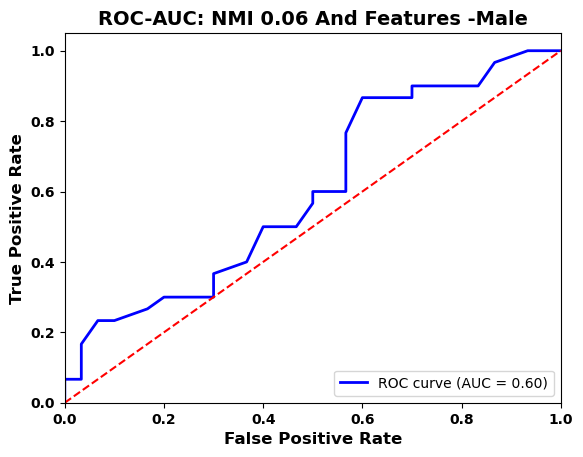

In [11]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI 0.06 And Features -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI06_Methylome_withFeaturesMale.svg')
plt.savefig('ROC_AUC_NMI06_Methylome_withFeaturesMale.pdf')
plt.show()


In [17]:
df = pd.read_csv('CommonCpg_inNMI06AndTop50s_Male.csv')
df['APPRDX'] = df['APPRDX'] -1
print(df.shape)
df.head(2)

(308, 86)


,APPRDX,cg13675469,cg01360545,cg14874036,cg11485463,cg10946043,cg15308142,cg17713010,cg04369109,cg06796451,...,cg01408558,cg25622125,cg15953070,cg24595745,cg23336965,cg01070424,cg04559183,cg06435511,cg20003494,cg16004767
0,0,0.012919,0.605723,0.802617,0.011261,0.018902,0.753923,0.043544,0.012305,0.846454,...,0.770711,0.887726,0.861183,0.012493,0.724662,0.450485,0.019346,0.960060,0.025708,0.882369
1,1,0.011403,0.561032,0.816139,0.018438,0.015856,0.743975,0.021684,0.010500,0.843151,...,0.733900,0.910430,0.870926,0.012928,0.670002,0.351910,0.017500,0.962378,0.035014,0.892872


In [18]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df.groupby('APPRDX').apply(lambda x: x.sample(80))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.74375
2
Mean accuracy: 0.71875
3
Mean accuracy: 0.725
4
Mean accuracy: 0.75
5
Mean accuracy: 0.775
6
Mean accuracy: 0.7875
7
Mean accuracy: 0.7625
8
Mean accuracy: 0.7875
9
Mean accuracy: 0.7625
10
Mean accuracy: 0.7875
11
Mean accuracy: 0.75
12
Mean accuracy: 0.75625
13
Mean accuracy: 0.75625
14
Mean accuracy: 0.78125
15
Mean accuracy: 0.7
16
Mean accuracy: 0.75625
17
Mean accuracy: 0.76875
18
Mean accuracy: 0.76875
19
Mean accuracy: 0.725
20
Mean accuracy: 0.74375
21
Mean accuracy: 0.8125
22
Mean accuracy: 0.69375
23
Mean accuracy: 0.74375
24
Mean accuracy: 0.775
25
Mean accuracy: 0.83125
26
Mean accuracy: 0.78125
27
Mean accuracy: 0.70625
28
Mean accuracy: 0.7375
29
Mean accuracy: 0.74375
30
Mean accuracy: 0.79375
31
Mean accuracy: 0.78125
32
Mean accuracy: 0.775
33
Mean accuracy: 0.74375
34
Mean accuracy: 0.7875
35
Mean accuracy: 0.775
36
Mean accuracy: 0.7375
37
Mean accuracy: 0.71875
38
Mean accuracy: 0.775
39
Mean accuracy: 0.73125
40
Mean accuracy: 0.8125
41


In [19]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("CommonCpg_inNMI06AndTop50s_Male_100RF.csv", index=False)

0.7549375000000004


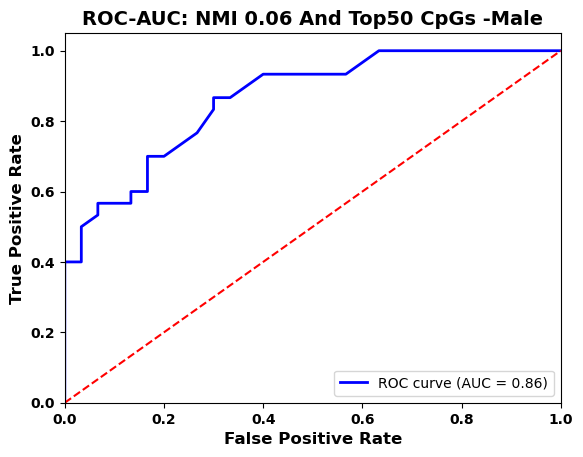

In [21]:
dataset = df.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: NMI 0.06 And Top50 CpGs -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_NMI06_AndTop50CpGs_Male.svg')
plt.savefig('ROC_AUC_NMI06_AndTop50CpGs_Male.pdf')
plt.show()


In [26]:
df1 = pd.read_csv ('CommonCpg_inNMI06AndTop50s_Male.csv')
df2 = pd.read_csv ('Any2Common_inAll45Feats_Data_Male_t.csv')
df = pd.merge(df1, df2, on = 'PATNO', how = 'inner')
print(df.shape)
df.to_csv('CommonCpg_inNMI06AndTop50s_withFeaturesMale.csv', index = False)
df.head(2)

Z:\PPMI_Data\Excels\NonMotors\Derived250\Male\GeneCpG\Xtras\Top_CpGWithFeat_RanFor
(110, 95)


,PATNO,APPRDX,cg13675469,cg01360545,cg14874036,cg11485463,cg10946043,cg15308142,cg17713010,cg04369109,...,cg20003494,cg16004767,UPSIT,MDSP_Fatigue,MDS_Depress,MDSP_SleepDay,Montreal_Cognitive,Symbol_Digit,Trail_Making_B,Hopkins_Recog
0,3010,1,0.012562,0.555188,0.849009,0.014304,0.020772,0.832815,0.019980,0.012305,...,0.044374,0.911231,2,1,0,1,0,1,0,0
1,3024,1,0.007567,0.601045,0.689983,0.011359,0.014965,0.769108,0.032327,0.009291,...,0.024791,0.906352,0,0,0,1,0,1,1,0


In [27]:
df = pd.read_csv('CommonCpg_inNMI06AndTop50s_withFeaturesMale.csv')
df['APPRDX'] = df['APPRDX'] -1
df1 = df.drop(['PATNO'], axis = 1)
print(df1.shape)
df1.head(2)

(110, 94)


,APPRDX,cg13675469,cg01360545,cg14874036,cg11485463,cg10946043,cg15308142,cg17713010,cg04369109,cg06796451,...,cg20003494,cg16004767,UPSIT,MDSP_Fatigue,MDS_Depress,MDSP_SleepDay,Montreal_Cognitive,Symbol_Digit,Trail_Making_B,Hopkins_Recog
0,0,0.012562,0.555188,0.849009,0.014304,0.020772,0.832815,0.019980,0.012305,0.832158,...,0.044374,0.911231,2,1,0,1,0,1,0,0
1,0,0.007567,0.601045,0.689983,0.011359,0.014965,0.769108,0.032327,0.009291,0.907094,...,0.024791,0.906352,0,0,0,1,0,1,1,0


In [30]:
np.random.seed (1)
dframe1 = pd.DataFrame(columns=['Accuracy', 'Std_Dev'])

for i in range(1, 101):
    print(i)
    df2 = df1.groupby('APPRDX').apply(lambda x: x.sample(30))
    X = df2.drop('APPRDX', axis = 1)
    y = df2['APPRDX']
    random_forest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5, criterion = 'gini')
    scores = cross_val_score(random_forest_model, X, y, cv = 10, n_jobs = -1)
    mean_score = scores.mean()
    print(f'Mean accuracy: {mean_score}')
    new_row = {'Accuracy': mean_score, 'Std_Dev': std(scores)}
    dframe1 = pd.concat([dframe1, pd.DataFrame(new_row, index=[0])], ignore_index=True)


1
Mean accuracy: 0.6333333333333333
2
Mean accuracy: 0.5166666666666667
3
Mean accuracy: 0.5666666666666667
4
Mean accuracy: 0.6166666666666667
5
Mean accuracy: 0.65
6
Mean accuracy: 0.6166666666666667
7
Mean accuracy: 0.6333333333333334
8
Mean accuracy: 0.6
9
Mean accuracy: 0.6
10
Mean accuracy: 0.5666666666666667
11
Mean accuracy: 0.6666666666666667
12
Mean accuracy: 0.5666666666666667
13
Mean accuracy: 0.6666666666666666
14
Mean accuracy: 0.6333333333333333
15
Mean accuracy: 0.55
16
Mean accuracy: 0.6166666666666666
17
Mean accuracy: 0.5999999999999999
18
Mean accuracy: 0.55
19
Mean accuracy: 0.6166666666666667
20
Mean accuracy: 0.6666666666666666
21
Mean accuracy: 0.65
22
Mean accuracy: 0.6166666666666666
23
Mean accuracy: 0.55
24
Mean accuracy: 0.6333333333333333
25
Mean accuracy: 0.6833333333333333
26
Mean accuracy: 0.6833333333333333
27
Mean accuracy: 0.6500000000000001
28
Mean accuracy: 0.55
29
Mean accuracy: 0.6166666666666666
30
Mean accuracy: 0.6166666666666667
31
Mean accur

In [31]:
print(mean(dframe1['Accuracy']))
dframe1.to_csv ("CommonCpg_inNMI06AndTop50s_withFeaturesMale_100RF.csv", index=False)

0.6203333333333335


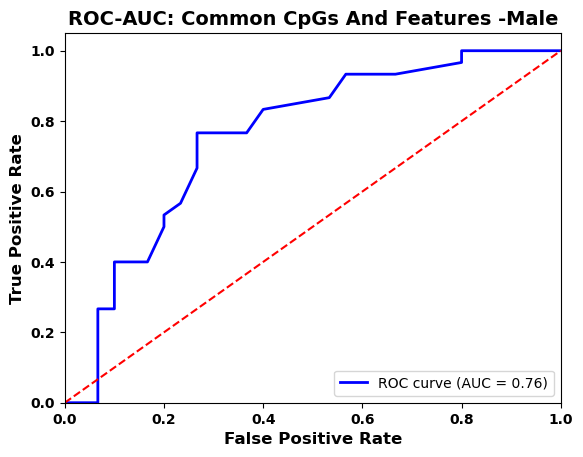

In [29]:
dataset = df1.groupby('APPRDX').apply(lambda x: x.sample(30, random_state=1))
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')

# Generate predicted probabilities using cross-validation
y_prob = cross_val_predict(classifier, X, y, cv=10, method='predict_proba')

# Calculate the false positive rate and true positive rate for different thresholds
fpr, tpr, thresholds = roc_curve(y, y_prob[:, 1], pos_label=1)

# Calculate the area under the ROC curve
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='b', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='r', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.xlabel('False Positive Rate', fontweight='bold',fontsize=12)
plt.ylabel('True Positive Rate', fontweight='bold',fontsize=12)
plt.title('ROC-AUC: Common CpGs And Features -Male', fontweight='bold',fontsize=14)
plt.legend(loc="lower right")
# save the plot as SVG and PDF files
plt.savefig('ROC_AUC_CommonCpGsAndFeats_Male.svg')
plt.savefig('ROC_AUC_CommonCpGsAndFeats_Male.pdf')
plt.show()
